## History data

In [230]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix

import seaborn as sns
sns.set_style("white")
fig_w = 2530
fig_h = 1900
my_dpi=200

import dateutil

In [268]:
from matplotlib import animation, rc
from IPython.display import HTML

Config plot styles

In [231]:
plt.style.use('ggplot')

from matplotlib import rcParams
# plt.rcParams['font.sans-serif'] = ['SimHei']  # 用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False  # 用来正常显示负号

plt.rc('font', family='BabelStone Han', size=13) # 选择你自己电脑上的字体

Load data

In [232]:
# 如果还没有数据，来群里索要数据文件就行

df = pd.read_csv('data/full-data.csv') 

Validate all the possible columns of data frame

In [233]:
list(df.columns.values)

['Unnamed: 0',
 'aid',
 'uid',
 'time',
 'duration',
 'state',
 'view',
 'danmaku',
 'coin',
 'favorite',
 'share',
 'reply',
 'like',
 'sectid',
 'sectname']

In [234]:
df['time'] = pd.to_datetime(df['time'],unit='s')#.dt.date

Have to remove those negative views.

In [235]:
df[df['view']<0];

In [236]:
len(df[df['view']<0].index)

90172

In [237]:
df = df[df['view'] >= 0]

In [219]:
df;

## Group by sects

Get all the sects by sectname

In [202]:
sects = df.sectname.unique()
sects[0]

'连载剧集'

Create a dataframe to store the average data

In [257]:
index_store = ['date','tduration', 'tview', 'tcoin', 'tfavorite', 'tlike','totalv','mostaid','sectname','sectid']

df_history = pd.DataFrame(columns = index_store)

max_date = df.time.max()
min_date = df.time.min()

print('All vid Start date:' + str(min_date))
print('All vid End date:' + str(max_date))



# idx = 3
for idx in np.arange(len(sects) ):
    df_sect = df[df['sectname']==sects[idx]] 

    max_date_sect = df_sect.time.max()
    min_date_sect = df_sect.time.min()
    sect_id_str = str(df_sect.sectid.unique()[0])
    sect_name_str = str(sects[idx])
    print('Dealing with: '+sect_name_str)
    print('Start date:' + str(min_date_sect))
    print('End date:' + str(max_date_sect))

    dateseries = pd.date_range(start=min_date, end=max_date, freq='10D')


    df_store = pd.DataFrame(columns=index_store)


    ########
    # Loop Through Dates
    ########

    # d_idx = 0
    sectid_temp = df_sect.sectid.unique()[0]
    print('sectid is: '+ str(sectid_temp) )

    for d_idx in np.arange(len(dateseries) -1 ):
        df_sect_temp = df_sect[df_sect['time'].between(dateseries[d_idx],dateseries[d_idx+1])]

        if  not df_sect_temp.empty:
            mostviewed_temp = df_sect_temp.loc[df_sect_temp['view'].idxmax()].aid
            totalrows_temp = len(df_sect_temp.index)
            sumviews_temp = np.sum(df_sect_temp['view'].values)
            sumduration_temp = np.sum(df_sect_temp['duration'].values)
            sumcoin_temp = np.sum(df_sect_temp['coin'].values)
            sumfav_temp = np.sum(df_sect_temp['favorite'].values)
            sumlike_temp = np.sum(df_sect_temp['like'].values)

            df_sect_temp2 = df_sect_temp.mean().round(2)

            values_temp = [dateseries[d_idx] , sumduration_temp, sumviews_temp, sumcoin_temp, sumfav_temp, sumlike_temp, totalrows_temp ,mostviewed_temp, sects[idx], sectid_temp]

            df_store_temp = pd.DataFrame([values_temp],columns=['date','tduration', 'tview', 'tcoin', 'tfavorite', 'tlike','totalv','mostaid', 'sectname','sectid'])


            df_store = (pd.concat([df_store, df_store_temp]) ).reset_index(drop=True)
        else:
            values_temp = [dateseries[d_idx] , 0, 0, 0, 0, 0, 0 ,0, sects[idx], sectid_temp]

            df_store_temp = pd.DataFrame([values_temp],columns=['date','tduration', 'tview', 'tcoin', 'tfavorite', 'tlike','totalv','mostaid', 'sectname','sectid'])

            df_store = (pd.concat([df_store, df_store_temp]) ).reset_index(drop=True)


    print(sect_name_str + ' has ' + str( len(df_store.index) ) + 'rows' )

    if  not df_store.empty:
        df_store['date'] = df_store['date'].dt.date

        df_history = pd.concat([df_history, df_store])
#         df_store.to_csv('export/batch/'+sect_id_str+'-'+sect_name_str+'.csv', sep=',', encoding='utf-8')

#         print('Data saved')        

All vid Start date:2009-06-26 07:11:36
All vid End date:2018-02-28 15:00:27
Dealing with: 连载剧集
Start date:2017-08-30 13:14:52
End date:2017-10-24 09:16:47
sectid is: 15
连载剧集 has 316rows
Dealing with: flash游戏
Start date:2010-10-04 23:00:49
End date:2012-03-30 07:24:04
sectid is: 16
flash游戏 has 316rows
Dealing with: 单机联机
Start date:2009-07-03 11:10:16
End date:2018-02-28 07:36:52
sectid is: 17
单机联机 has 316rows
Dealing with: Mugen
Start date:2009-07-14 14:59:24
End date:2018-02-28 07:10:03
sectid is: 19
Mugen has 316rows
Dealing with: 宅舞
Start date:2009-07-15 12:34:50
End date:2018-02-28 07:39:39
sectid is: 20
宅舞 has 316rows
Dealing with: 日常
Start date:2009-06-26 07:15:45
End date:2018-02-28 08:06:32
sectid is: 21
日常 has 316rows
Dealing with: 鬼畜调教
Start date:2009-07-14 01:23:55
End date:2018-02-28 07:09:05
sectid is: 22
鬼畜调教 has 316rows
Dealing with: MAD-AMV
Start date:2009-07-15 07:12:48
End date:2018-02-28 08:16:54
sectid is: 24
MAD-AMV has 316rows
Dealing with: MMD-3D
Start date:2009-0

In [270]:
df.sectname.unique(),\
df_history.sectname.unique()

(array(['连载剧集', 'flash游戏', '单机联机', 'Mugen', '宅舞', '日常', '鬼畜调教', 'MAD-AMV',
        'MMD-3D', '音MAD', '综合', '原创音乐', '三次元音乐', 'VOCALOID-UTAU', '翻唱',
        '完结动画', '连载动画', '人文历史', '演讲-公开课', '未知', 'MMD.3D', '短片-手书-配音', '资讯',
        'OP-ED-OST', '演奏', '网络游戏', '单机游戏', '综艺', '动物圈', '美食圈', '喵星人',
        '美食视频', '电影相关', '其他国家', '短片', '特摄', '剧场版', '数码', '星海', '机械', 'GMV',
        '野生技术协会', '趣味科普人文', '其他', '人力VOCALOID', '教程演示', '电视剧相关', '音乐选集',
        'Korea相关', '音游', '明星', '搞笑', '实况解说', '游戏集锦', '欧美电影', '日本电影',
        '国产电影', '官方延伸', '国产动画', '三次元舞蹈', '舞蹈教程', '美妆', '服饰', '手工', '绘画',
        '运动', '健身', '广告', '国产原创相关', '布袋戏', '电子竞技', '手机游戏', '桌游棋牌', 'ASMR',
        '汽车', '科学探索', '热血军事', '舌尖上的旅行', '影视杂谈', '影视剪辑', '预告 资讯', '国产剧',
        '海外剧'], dtype=object),
 array(['连载剧集', 'flash游戏', '单机联机', 'Mugen', '宅舞', '日常', '鬼畜调教', 'MAD-AMV',
        'MMD-3D', '音MAD', '综合', '原创音乐', '三次元音乐', 'VOCALOID-UTAU', '翻唱',
        '完结动画', '连载动画', '人文历史', '演讲-公开课', '未知', 'MMD.3D', '短片-手书-配音', '资讯',
        'OP-ED-

In [275]:
# df_history.to_csv('export/'+'history_data.csv', sep=',', encoding='utf-8')

In [278]:
df_history

,date,tduration,tview,tcoin,tfavorite,tlike,totalv,mostaid,sectname,sectid
0,2009-06-26,0,0,0,0,0,0,0,连载剧集,15
1,2009-07-06,0,0,0,0,0,0,0,连载剧集,15
2,2009-07-16,0,0,0,0,0,0,0,连载剧集,15
3,2009-07-26,0,0,0,0,0,0,0,连载剧集,15
4,2009-08-05,0,0,0,0,0,0,0,连载剧集,15
5,2009-08-15,0,0,0,0,0,0,0,连载剧集,15
6,2009-08-25,0,0,0,0,0,0,0,连载剧集,15
7,2009-09-04,0,0,0,0,0,0,0,连载剧集,15
8,2009-09-14,0,0,0,0,0,0,0,连载剧集,15
9,2009-09-24,0,0,0,0,0,0,0,连载剧集,15


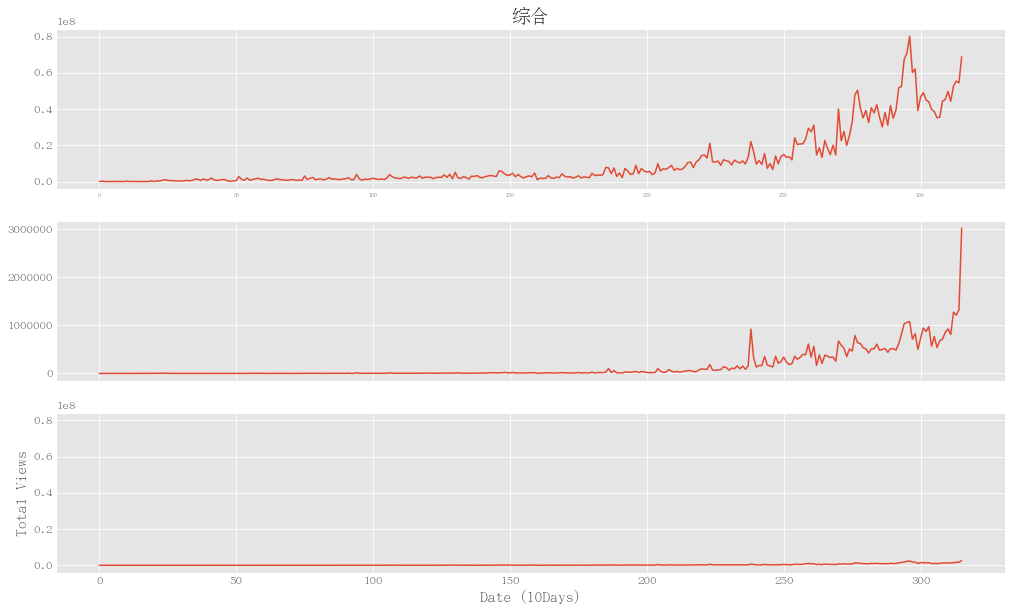

In [314]:
s_id = 10
df_history[df_history['sectname']==sects[s_id]]

plt.figure(figsize=(17,10))
ax1 = plt.subplot(311)
plt.plot( df_history[df_history['sectname']==sects[s_id]]['tview'].values )
plt.setp(ax1.get_xticklabels(), fontsize=6)
plt.title(sects[s_id])

# share x only
ax2 = plt.subplot(312, sharex=ax1)
plt.plot( df_history[df_history['sectname']==sects[s_id]]['tcoin'].values )
# make these tick labels invisible
plt.setp(ax2.get_xticklabels(), visible=False)

# share x and y
ax3 = plt.subplot(313, sharex=ax1, sharey=ax1)
plt.plot( df_history[df_history['sectname']==sects[s_id]]['tfavorite'].values )


plt.xlabel('Date (10Days)')
plt.ylabel('Total Views')
plt.show()
